### Changes
Uses model.train_on_batch() instead of GradientTape.
For the action that is being trained, uses standard target; for the 
other four actions, uses the current network's predictions as targets
to negate any loss.

In [1]:
# Import packages.
import queue, random, threading, math, time, pickle
import tensorflow as tf             # Tensorflow.
import numpy as np                  # I chose NumPy instead of Pandas because it uses less RAM.
import tkinter as tkinter           # Required to control the game.
import matplotlib.pyplot as plt     # Plotting statistics.

from MLSnake import Game_2 as snake
from MLSnake import Agent_2 as agent
from MLSnake import config as cfg

# This code allows for the GPU to be utilized properly.
tf.autograph.set_verbosity(0)
physical_devices = tf.config.list_physical_devices("GPU")
try:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

print(physical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
def plot(data, x, y):
    '''Plot statistics.'''
    
    print(y + " v. " + x)
    plt.plot(data)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    print()

SavedModel file does not exist at: ./save/model/{saved_model.pbtxt|saved_model.pb}
[Errno 2] No such file or directory: './save/train_data.dat'
[Errno 2] No such file or directory: './save/states_memory.npy'
Model: "DQN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 170)               114920    
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 855       
Total params: 115,775
Trainable params: 115,775
Non-trainable params: 0
_________________________________________________________________
Model: "Target_DQN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 170)               114920    
_________________________________________________________________
dense_3 (Dense)            

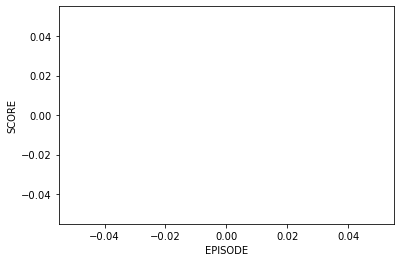


LOSS v. FRAME


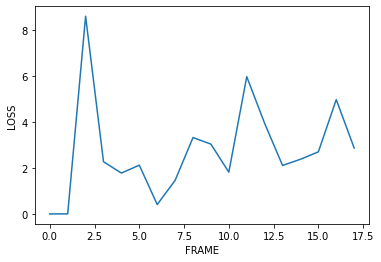

In [3]:
game = snake.game()
snake_agent = agent.agent(game)
x = 0

while True:
    snake_agent.start()

    if x % cfg.autosave_period == 0:
        snake_agent.save_all()

        print("Average score: " + str(sum(snake_agent.stats["score"]) / len(snake_agent.stats["score"])))
        print("Average loss: " + str(sum(snake_agent.stats["loss"]) / len(snake_agent.stats["loss"])))
        plot(snake_agent.stats["score"], "EPISODE", "SCORE")
        plot(snake_agent.stats["loss"], "FRAME", "LOSS")
    x += 1

    # Trackthe score/performance of the agent.
    snake_agent.stats["score"].append(game.score)